EE 122: Cruise Control Example

Make sure that you install python-control by running

```
pip install control
```

The code below is extracted from python-control/examples

```
cruise-control.py - Cruise control example from FBS
RMM, 16 May 2019
```

The cruise control system of a car is a common feedback system encountered
in everyday life. The system attempts to maintain a constant velocity in the
presence of disturbances primarily caused by changes in the slope of a
road. The controller compensates for these unknowns by measuring the speed
of the car and adjusting the throttle appropriately.

This file explores the dynamics and control of the cruise control system,
following the material presented in Feedback Systems by Astrom and Murray.
A full nonlinear model of the vehicle dynamics is used, with both PI and
state space control laws. Different methods of constructing control systems
are shown, all using the InputOutputSystem class (and subclasses).


### For the first week of class, you may ignore the details in the next cell, and simply run it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import control as ct

from cruise_control_models import vehicle_update

# For this week's problem set, we directly use the cruise control
# model stored in cruise_control_models.py. The goal is to simply
# run the notebook and observe the changes as you change the parameters.


# Define the input/output system for the vehicle
vehicle = ct.NonlinearIOSystem(
    vehicle_update, None, name='vehicle',
    inputs=('u', 'gear', 'theta'), outputs=('v'), states=('v'))

# Figure 1.11: A feedback system for controlling the speed of a vehicle. In
# this example, the speed of the vehicle is measured and compared to the
# desired speed.  The controller is a PI controller represented as a transfer
# function.  In the textbook, the simulations are done for LTI systems, but
# here we simulate the full nonlinear system.


## The controller:

In [2]:
# Nominal controller design for remaining analyses
# Construct a PI controller with rolloff, as a transfer function
Kp = 0.5                      # proportional gain
Ki = 0.1                        # integral gain
PI_control = ct.tf(
    [Kp, Ki], [1, 0.01*Ki/Kp], name='control',
    inputs='u', outputs='y')

cruise_PI = ct.interconnect(
    (vehicle, PI_control), name='cruise',
    connections = [['control.u', '-vehicle.v'], ['vehicle.u', 'control.y']],
    inplist = ['control.u', 'vehicle.gear', 'vehicle.theta'],
    inputs = ['vref', 'gear', 'theta'],
    outlist = ['vehicle.v', 'vehicle.u'], outputs = ['v', 'u'])

### Experiment with different mass values below:


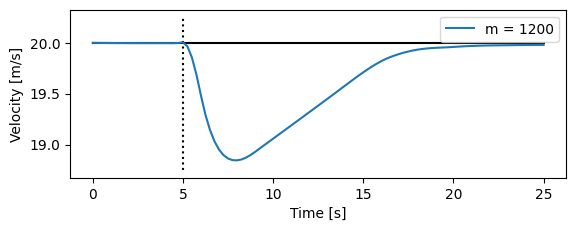

In [3]:
# Define the time and input vectors
T = np.linspace(0, 25, 101)
vref = 20 * np.ones(T.shape)
gear = 4 * np.ones(T.shape)
theta0 = np.zeros(T.shape)

# Now simulate the effect of a hill at t = 5 seconds
theta_hill = np.array([
    0 if t <= 5 else
    8./180. * np.pi * (t-5) if t <= 6 else
    8./180. * np.pi for t in T])

# Create the plot and add a line at the reference speed
plt.subplot(2, 1, 1)
# plt.axis([0, T[-1], 18.75, 20.25])
plt.plot([T[0], T[-1]], [vref[0], vref[-1]], 'k-')      # reference velocity
plt.plot([5, 5], [18.75, 20.25], 'k:')                  # disturbance start

m = 1200
# Compute the equilibrium state for the system
X0, U0 = ct.find_eqpt(
    cruise_PI,
    [vref[0], 0],
    [vref[0], gear[0], theta0[0]], 
    iu=[1, 2], y0=[vref[0], 0], iy=[0], params={'m': m})

# Simulate the effect of a hill
t, y = ct.input_output_response(
    cruise_PI, T,
    [vref, gear, theta_hill],
    X0, params={'m':m})

# Plot the response for this mass
plt.plot(t, y[cruise_PI.find_output('v')], label='m = %d' % m)

# Add labels and legend to the plot
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.show()

### Describe what you simulated and your understanding of the simulations below

[your text here]